 <h1>OWIS Al-hammoud   &&  Mohammed Raslan</h1>

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

importing libraries section 

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score
import seaborn as sns

importing the csv file and print first five items

In [218]:
df=pd.read_csv('milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [219]:
df.shape

(1059, 8)

In [220]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


ensure their isn't a null values and missing values for preproccessing  

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


hundle th text values 

In [222]:
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# col=df['Grade']
# col=ordinal_encoder.fit_transform(col.values.reshape(-1,1))
# df['Grade']=col
# df.head()

this box for splitting the data to train data and the test data with 25% for testing and 75% for trainning  

In [223]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print('X shape is ' , x.shape)
print('X Features are \n' , x.columns)
print('y shape is ' , y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=77,stratify=y,shuffle=True)
print('X_train shape is ' , x_train.shape)
print('X_test shape is ' , x_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X shape is  (1059, 7)
X Features are 
 Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype='object')
y shape is  (1059,)
X_train shape is  (794, 7)
X_test shape is  (265, 7)
y_train shape is  (794,)
y_test shape is  (265,)


<h3>definning 4 models :</h3>
   <ul>
   <li> SVM , KNN , GaussianNB,
    <li>DecisionTree: out of practical sessions
    </ul> 

In [224]:
clfs={}
clfs['SVM']=SVC(kernel='linear')
clfs['KNN']=KNeighborsClassifier(weights='distance', n_neighbors=7)
clfs['GaussianNB']=GaussianNB()
clfs['DecisionTree']=DecisionTreeClassifier(criterion='entropy' ,random_state=0) 

train the Classifiers Model and predict classification of test data and calculate accuracy score and confusion matrix

SVM  : 
0.8679245283018868


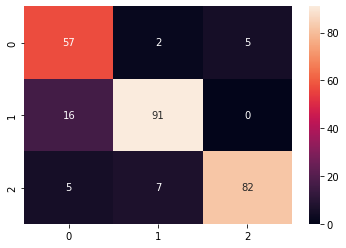

------------------------------------------------
KNN  : 
0.9962264150943396


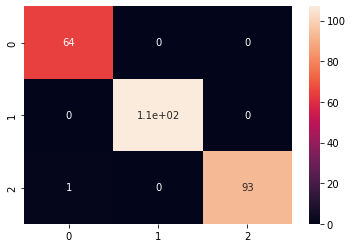

------------------------------------------------
GaussianNB  : 
0.8339622641509434


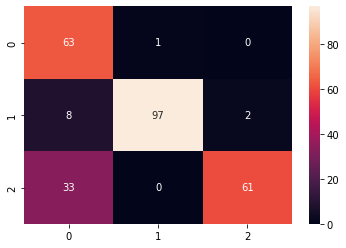

------------------------------------------------
DecisionTree  : 
0.9924528301886792


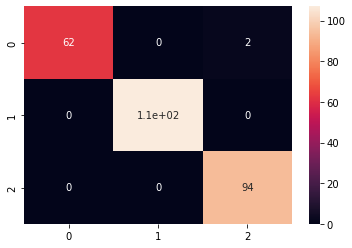

------------------------------------------------


In [225]:

ac={}
cm={}
for i in clfs:
    clfs[i].fit(x_train,y_train)
    y_pred=clfs[i].predict(x_test)
    print(i," : ")
    ac[i]= accuracy_score(y_test,y_pred)
    print(ac[i])
    cm[i]=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm[i],annot=True)
    plt.show()
    print("------------------------------------------------")
    

awesome comparing accuraecy score

In [226]:
ndf=pd.DataFrame(data=ac.values(),columns=['accuracy_score'],index=ac.keys())
ndf

,accuracy_score
SVM,0.867925
KNN,0.996226
GaussianNB,0.833962
DecisionTree,0.992453
